In [59]:
import numpy as np
import cv2
from skimage.transform import (hough_line, hough_line_peaks, hough_circle,
hough_circle_peaks)
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage.data import astronaut
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage import img_as_float
from skimage.morphology import skeletonize
from skimage import data, img_as_float, io, feature
import matplotlib.pyplot as pylab
from matplotlib import cm
from matplotlib import pyplot as plt
from skimage.filters import sobel, threshold_otsu
from skimage.feature import canny
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries

In [92]:
imfile = 'E:\photos\IMG_20170819_095405_566.jpg'
img = img_as_float(imread(imfile)[::2, ::2, :3])
pylab.figure(figsize=(20, 10))
segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=400)
borders = find_boundaries(segments_fz)
unique_colors = np.unique(segments_fz.ravel())
segments_fz[borders] = -1
colors = [np.zeros(3)]

<Figure size 1440x720 with 0 Axes>

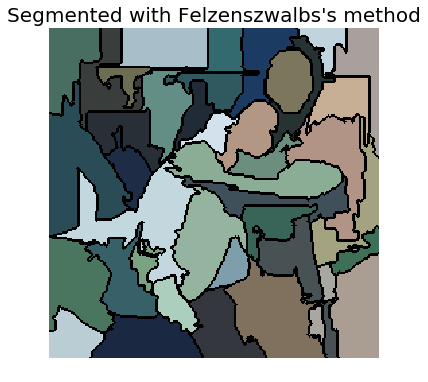

In [103]:
for color in unique_colors:
    colors.append(np.mean(img[segments_fz == color], axis=0))
cm = LinearSegmentedColormap.from_list('pallete', colors, N=len(colors))
pylab.subplots(figsize=(13, 10))
pylab.subplot(122), pylab.imshow(segments_fz, cmap=cm), pylab.title('Segmented with Felzenszwalbs\'s method', size=20), pylab.axis('off')
pylab.show()

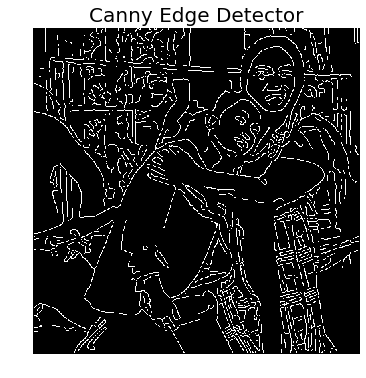

(Text(0.5, 1.0, 'Canny Edge Detector'), (-0.5, 488.5, 488.5, -0.5), None)

In [105]:
#edge detection
im = rgb2gray(imread(imfile))
edges = feature.canny(im, sigma=2)
fig, axes = pylab.subplots(figsize=(10, 6))
axes.imshow(edges, cmap=pylab.cm.gray, interpolation='nearest')
axes.set_title('Canny Edge Detector', size=20), axes.axis('off'), pylab.show()